# Proyecto de INF 354

## Brayan Dennis Aguilar Aparicio

## Predicción de la insuficiencia cardíaca

Las enfermedades cardiovasculares (ECV) son la causa número uno de muerte a nivel mundial, tomando un estimado de 17.9 millones de vidas cada año, lo que representa el 31% de todas las muertes en el mundo.
La insuficiencia cardíaca es un evento común causado por las ECV y este conjunto de datos contiene 12 características que pueden utilizarse para predecir la mortalidad por insuficiencia cardíaca.

La mayoría de las enfermedades cardiovasculares pueden prevenirse abordando los factores de riesgo del comportamiento, como el consumo de tabaco, la dieta poco saludable y la obesidad, la inactividad física y el consumo nocivo de alcohol, mediante estrategias que abarquen a toda la población.

Las personas con enfermedades cardiovasculares o que corren un alto riesgo cardiovascular (debido a la presencia de uno o más factores de riesgo como la hipertensión, la diabetes, la hiperlipidemia o una enfermedad ya establecida) necesitan una detección y gestión tempranas en las que un modelo de aprendizaje automático puede ser de gran ayuda.

## Introducción

Para esto haremos uso de tres modelos de aprendizaje supervisado: Arbol de decision, Red Neuronal y Regresion Logistica, para poder predecir las muertes a causa de una insuficiencia cardiaca y se compara los resultados de los tres modelos para ver cual es la mejor opcion para este problema.

## Columnas del Dataset

Para esto haermos uso del siguiente dataset Heart Failure Prediction de Kaglee el cual contiene las siguiente columnas en donde
la columna 13 es el target para los modelos

1. Edad: edad
2. Anemia: Disminución de los glóbulos rojos o de la hemoglobina (boolean)
3. creatinine_phosphokinase El nivel de la enzima CPK ( creatina-fosfocinasa)en la sangre (mcg/L)
4. diabetes: Si el paciente tiene diabetes (boolean)
5. ejection_fraction: Porcentaje de sangre que sale del corazón en cada contracción (porcentaje)
6. high_blood_pressure: Si el paciente tiene hipertensión (boolean)
7. platelets: Las plaquetas en la sangre (kiloplatelets/mL)
8. serum_creatinine: El nivel de suero de creatinina en la sangre (mg/dL)
9. serum_sodium: El nivel de suero de sodio en la sangre (mEq/L)
10. sex: Mujer u hombre (boolean)
11. smoking: si el paciente fuma o no (boolean)
12. time: Período de seguimiento (días)
13. DEATH_EVENT: Si el paciente falleció durante el período de seguimiento (boolean)

## Importamos las librerias





In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

Importamos los datos con pandas y damos una pequeña vista a los datos 

In [2]:
datos = pd.read_csv('heart_failure_clinical_records_dataset.csv')
datos.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

Verificamos si existe valores nulos

In [3]:
datos.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

Hacemos una descripcion de los datos con Pandas

In [4]:
datos.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

## Graficamos los datos 
Para asi poder ver que columnas nos puedan servir para hacer la prediccion 

Graficamos las muertes por edad, como se puede ver mientras mas mayores hay mas muertes tambien que la edad menor se encuentra entre 38-42

In [5]:
fig = px.histogram(datos, x="age", color="DEATH_EVENT", 
                   title ="Distribución de EDAD vs DEATH_EVENT", 
                   labels={"age": "Edad"})
fig.show()

Grafico del nivel enzima CPK en la sangre por muertes

In [6]:
fig = px.histogram(datos, x="creatinine_phosphokinase", color="DEATH_EVENT", 
                   title ="Distribution of CREATININE PHOSPHOKINASE vs DEATH_EVENT", 
                   labels={"creatinine_phosphokinase": "CREATININE PHOSPHOKINASE"}
                   )
fig.show()

Grafico del porcentaje de sangre que sale del corazón en cada contracción vs si muerieron o no

In [7]:
fig = px.histogram(datos, x="ejection_fraction", color="DEATH_EVENT", 
                   title ="Distribution of EJECTION FRACTION Vs DEATH_EVENT", 
                   labels={"ejection_fraction": "EJECTION FRACTION"})
fig.show()

Grafico de la cantidad de plaquetas en la sangre vs si muerieron o no

In [8]:
fig = px.histogram(datos, x="platelets", color="DEATH_EVENT",
                   title ="Distribution of PLATELETS Vs DEATH_EVENT", 
                   labels={"platelets": "PLATELETS"})
fig.show()

Grafico de el nivel de suero de creatinina en la sangre vs si murieron o no

In [9]:
fig = px.histogram(datos, x="serum_creatinine", color="DEATH_EVENT",
                   title ="Distribution of SERUM CREATININE Vs DEATH_EVENT", 
                   labels={"serum_creatinine": "SERUM CREATININE"})
fig.show()

Grafico de el nivel de suero de sodio en la sangre vs si murieron o no

In [10]:
fig = px.histogram(datos, x="serum_sodium", color="DEATH_EVENT",
                   title ="Distribution of SERUM SODIUM Vs DEATH_EVENT", 
                   labels={"serum_sodium": "SERUM SODIUM"})
fig.show()

Grafico de tiempo de seguimiento del paciente vs la muerte del mismo

In [11]:
fig = px.histogram(datos, x="time", color="DEATH_EVENT",
                   title ="Distribution of TIME Vs DEATH_EVENT", 
                   labels={"time": "TIME"})
fig.show()

Grafico de cuantas personas que murieron tenian diabetes

In [12]:
fig = px.pie(datos, values='diabetes',names='DEATH_EVENT', title='Eventos de muerte por diabetes')
fig.show()

Grafico de cuantas personas que murieron tenian anemias

In [13]:
fig = px.pie(datos, values='anaemia',names='DEATH_EVENT', title='Eventos de muerte por anemia')
fig.show()

Grafico de cuantas personas que murieron tenian hipertension 

In [14]:
fig = px.pie(datos, values='high_blood_pressure',names='DEATH_EVENT', title='Relación de eventos de muerte por hipertension')
fig.show()

Grafico de cuantas personas que murieron fumaban

In [15]:
fig = px.pie(datos, values='smoking',names='DEATH_EVENT', title='Relación de eventos de muerte por fumar')
fig.show()

## Eleccion de columnas
Luego de revisar los graficos y la teoria de las columas se llego a la conclusion de que Fumar,Anemia, Hipertension y Diabetes ya que no ayudan a determinar si una persona muere por insuficiencia cardiaca. Por los tanto se usaran las demas columnas para la los modelos 

In [16]:
X = datos.iloc[:, [2,4,6,7,8,11]].values 
y = datos.iloc[:,-1].values
print(X)

[[5.8200000e+02 2.0000000e+01 2.6500000e+05 1.9000000e+00 1.3000000e+02
  4.0000000e+00]
 [7.8610000e+03 3.8000000e+01 2.6335803e+05 1.1000000e+00 1.3600000e+02
  6.0000000e+00]
 [1.4600000e+02 2.0000000e+01 1.6200000e+05 1.3000000e+00 1.2900000e+02
  7.0000000e+00]
 ...
 [2.0600000e+03 6.0000000e+01 7.4200000e+05 8.0000000e-01 1.3800000e+02
  2.7800000e+02]
 [2.4130000e+03 3.8000000e+01 1.4000000e+05 1.4000000e+00 1.4000000e+02
  2.8000000e+02]
 [1.9600000e+02 4.5000000e+01 3.9500000e+05 1.6000000e+00 1.3600000e+02
  2.8500000e+02]]


In [17]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 1 1 1 1 1 0 0 1 0
 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0
 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0]


Antes vamos hacer un preprocesamiento de los datos de X para esto vamos ha usar el StandarScaler transforma los datos de tal manera que tiene una media de 0 y una desviación estándar de 1. En resumen, estandariza los datos. Es más útil en clasificación que en regresión

In [18]:
X = preprocessing.StandardScaler().fit(X).transform(X)
print(X)

[[ 1.65728387e-04 -1.53055953e+00  1.68164843e-02  4.90056987e-01
  -1.50403612e+00 -1.62950241e+00]
 [ 7.51463953e+00 -7.07675018e-03  7.53566018e-09 -2.84552352e-01
  -1.41976151e-01 -1.60369074e+00]
 [-4.49938761e-01 -1.53055953e+00 -1.03807313e+00 -9.09000174e-02
  -1.73104612e+00 -1.59078490e+00]
 ...
 [ 1.52597865e+00  1.85495776e+00  4.90208200e+00 -5.75030855e-01
   3.12043840e-01  1.90669738e+00]
 [ 1.89039811e+00 -7.07675018e-03 -1.26338936e+00  5.92615005e-03
   7.66063830e-01  1.93250906e+00]
 [-3.98321274e-01  5.85388775e-01  1.34823057e+00  1.99578485e-01
  -1.41976151e-01  1.99703825e+00]]


Ahora vamos definir la funcion para dividir los datos en donde tendra 10 splits y 20% para test

In [19]:
sss = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
lista_Mejor_precision = []

## Decision Tree Classifier
El modelo de árbol de decisión es un algoritmo de aprendizaje supervizado utilizado para clasificación y regresión, El objetivo es crear un modelo que prediga el resultado de una variable apartir de unas reglas de decisión simples que surgen a partir de las características de los datos.

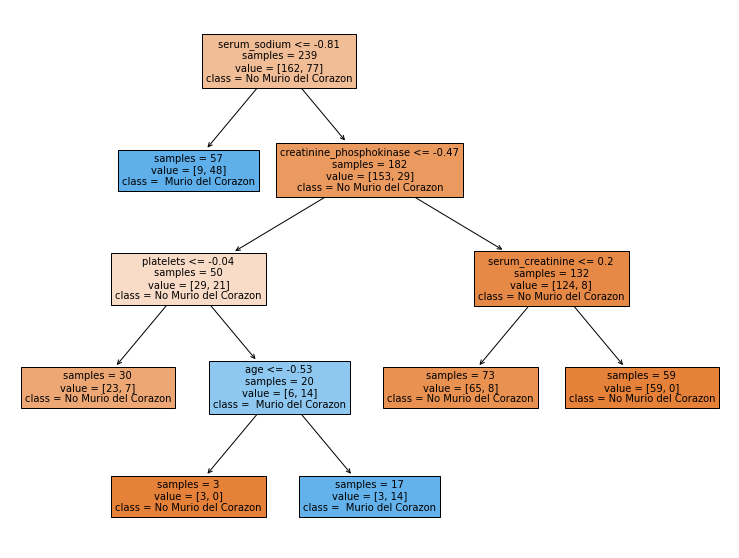

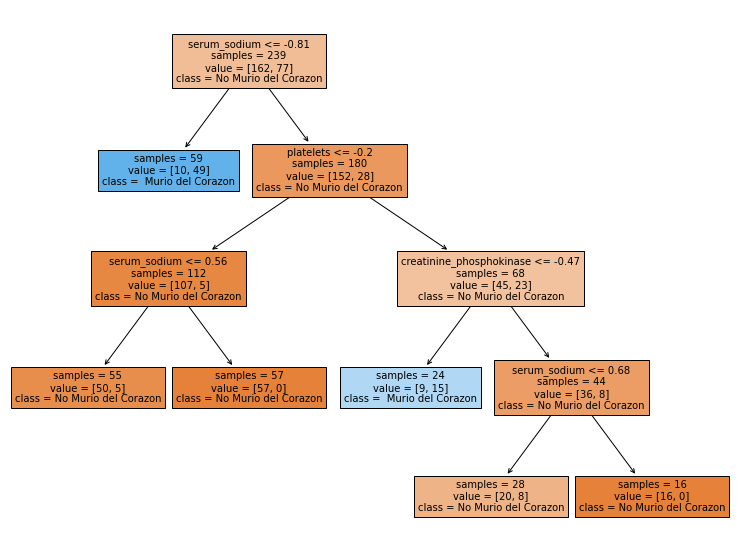

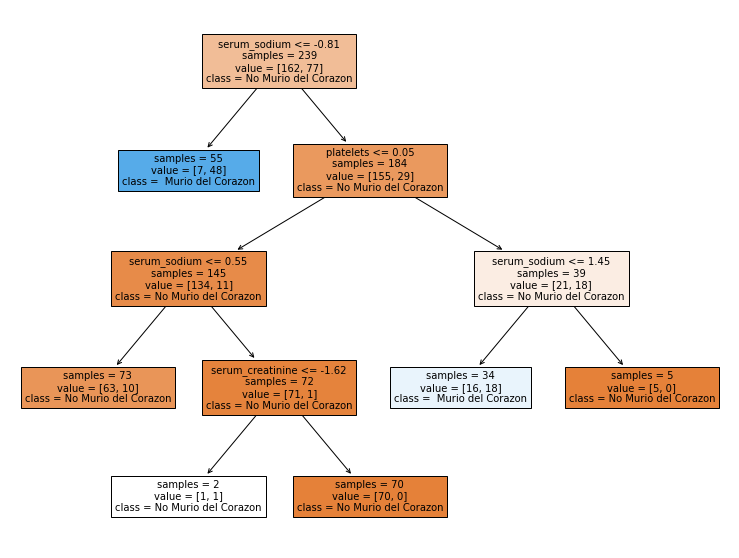

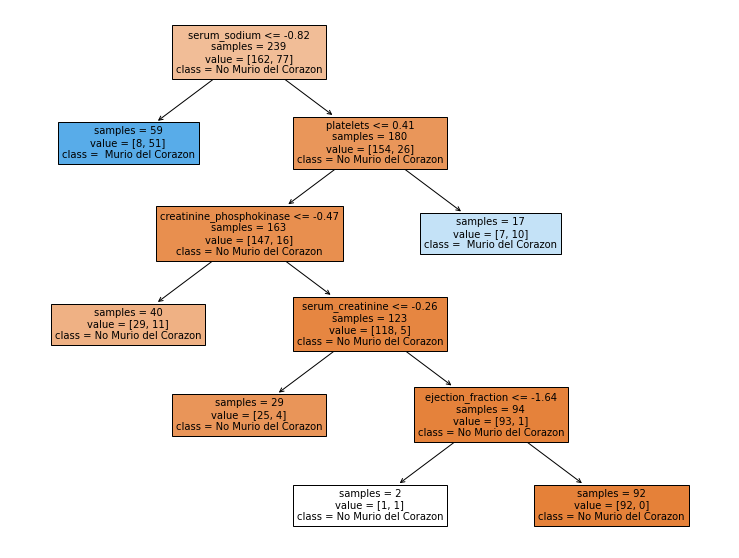

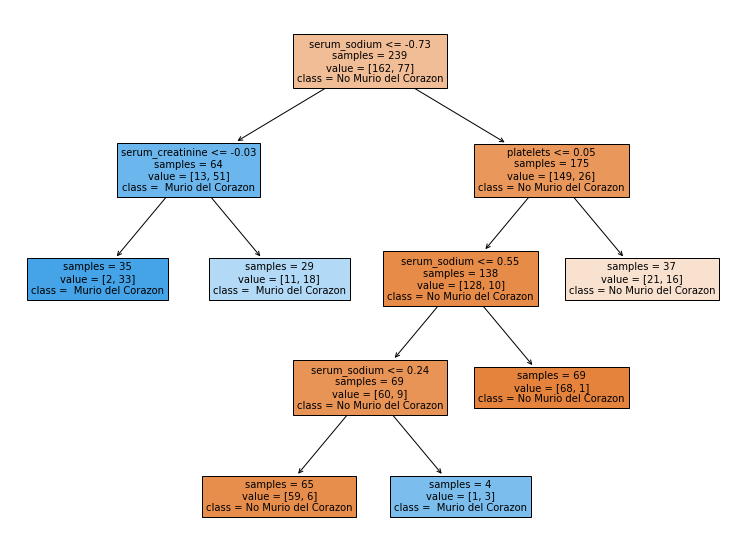

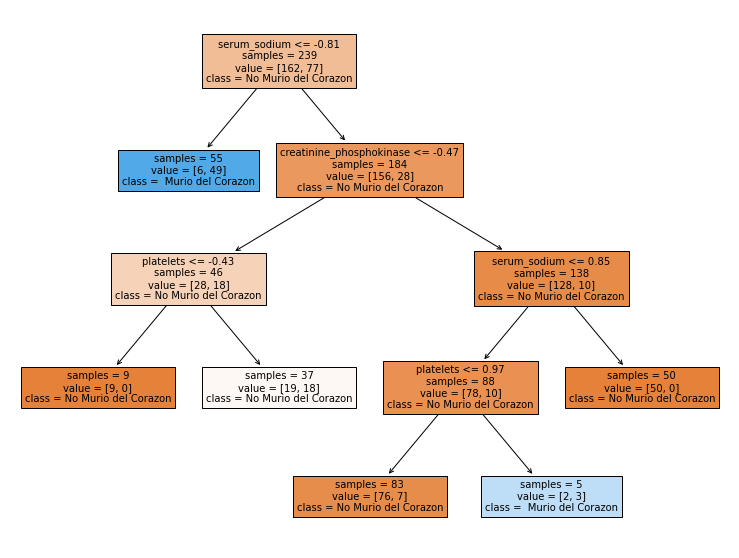

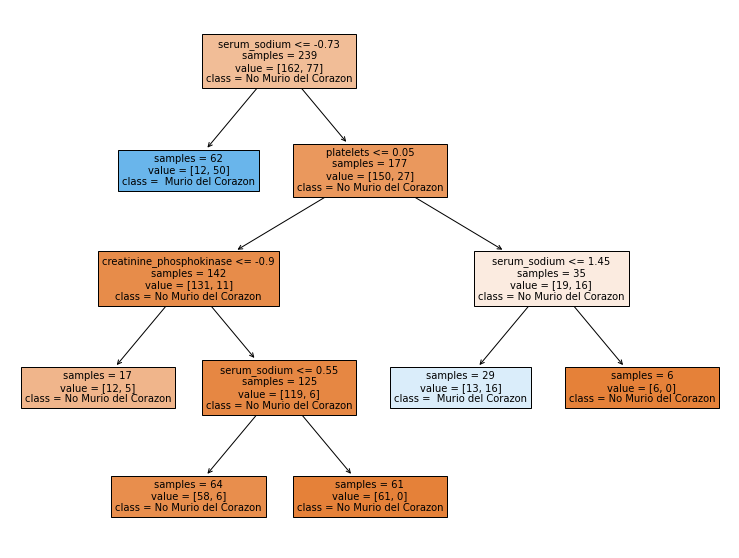

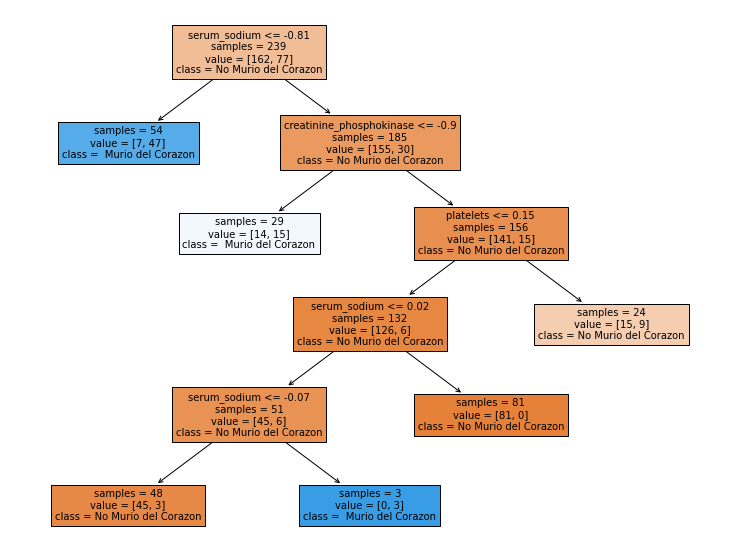

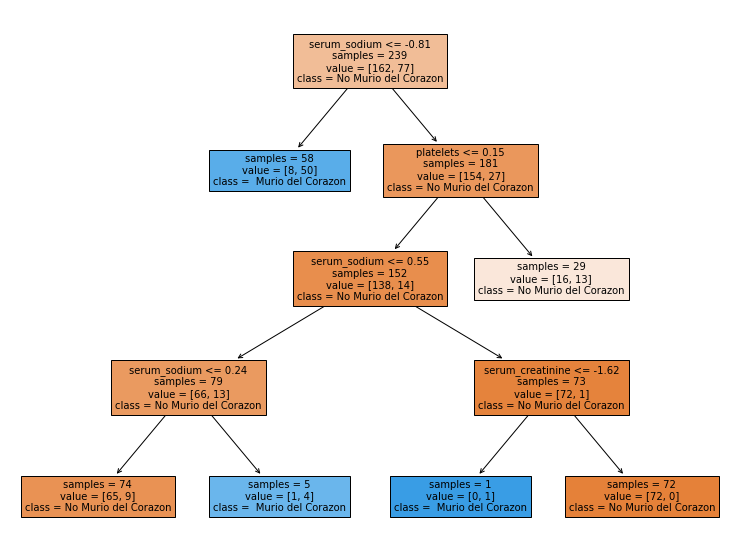

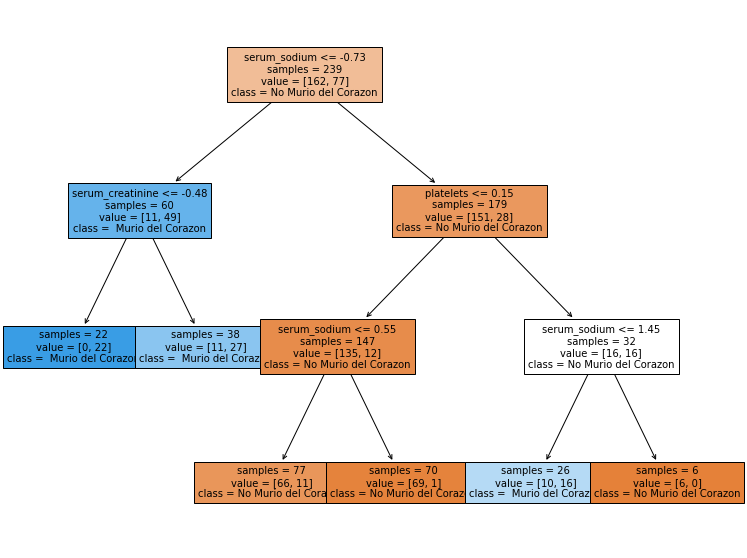

In [20]:
scores = [] # para almacenar la precision de cada division 
columnas = ['age','creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium','time']
# Definimos el arbol de decision 
arbolDec = DecisionTreeClassifier(random_state=0, criterion='entropy', max_leaf_nodes=6)
for train_index, test_index in sss.split(X, y):
    # guardamos los datos de entrenamiento y test
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index] 
    # ingresamos los datos de entrenamiento
    arbolDec.fit(X_train, y_train)
    # hacemos la prediccion 
    pred = arbolDec.predict(X_test)
    # guardamos la precision 
    scores.append(accuracy_score(y_test, pred))
    # grafica para el arbol de decision 
    fig, ax = plt.subplots(figsize=(13, 10))
    plot = plot_tree(
            decision_tree = arbolDec,
            feature_names = columnas,
            class_names   = ['No Murio del Corazon', ' Murio del Corazon'],
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )


Datos de precision del arbol 

In [21]:
print("\nArray de precision:\n%s"%(scores))
print("\nLa mejor precision:\n%s"%(max(scores)*100))



Array de precision:
[0.85, 0.8333333333333334, 0.8166666666666667, 0.7666666666666667, 0.9, 0.8, 0.85, 0.7833333333333333, 0.8166666666666667, 0.8333333333333334]

La mejor precision:
90.0


In [22]:
lista_Mejor_precision.append(max(scores)*100)
for train_index, test_index in sss.split(X, y):
    # guardamos los datos de entrenamiento y test
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index] 
    # ingresamos los datos de entrenamiento
    arbolDec.fit(X_train, y_train)
    # hacemos la prediccion 
    pred = arbolDec.predict(X_test)
    # guardamos la precision 
    cm = confusion_matrix(y_test, pred)
    print("\nMatriz de Confusion:\n%s"%(cm)) 


Matriz de Confusion:
[[38  3]
 [ 6 13]]

Matriz de Confusion:
[[36  5]
 [ 5 14]]

Matriz de Confusion:
[[35  6]
 [ 5 14]]

Matriz de Confusion:
[[35  6]
 [ 8 11]]

Matriz de Confusion:
[[41  0]
 [ 6 13]]

Matriz de Confusion:
[[36  5]
 [ 7 12]]

Matriz de Confusion:
[[34  7]
 [ 2 17]]

Matriz de Confusion:
[[32  9]
 [ 4 15]]

Matriz de Confusion:
[[38  3]
 [ 8 11]]

Matriz de Confusion:
[[33  8]
 [ 2 17]]


## Regresion logistica
La Regresión Logística es un método estadístico para predecir clases binarias. El resultado o variable objetivo es de naturaleza dicotómica. Dicotómica significa que solo hay dos clases posibles. Por ejemplo, se puede utilizar para problemas de detección de cáncer o calcular la probabilidad de que ocurra un evento.

In [23]:
X = datos.iloc[:, [2,4,6,7,8,11]].values
X = preprocessing.StandardScaler().fit(X).transform(X)
y = datos.iloc[:,-1].values
# Definimos el modelo
log = LogisticRegression(random_state=0)
scores = [] # para almacenar la precision de cada division 
for train_index, test_index in sss.split(X, y):
    # guardamos los datos de entrenamiento y test
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index] 
    # ingresamos los datos de entrenamiento
    log.fit(X_train, y_train)
    # hacemos la prediccion 
    pred = log.predict(X_test)
    # guardamos la precision 
    scores.append(accuracy_score(y_test, pred))
    
print("\nArray de precision:\n%s"%(scores))
print("\nLa mejor precision:\n%s"%(max(scores)*100))



Array de precision:
[0.8333333333333334, 0.8666666666666667, 0.8166666666666667, 0.8166666666666667, 0.85, 0.7333333333333333, 0.7833333333333333, 0.8166666666666667, 0.8166666666666667, 0.7666666666666667]

La mejor precision:
86.66666666666667


In [24]:
lista_Mejor_precision.append(max(scores)*100)
for train_index, test_index in sss.split(X, y):
    # guardamos los datos de entrenamiento y test
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index] 
    # ingresamos los datos de entrenamiento
    log.fit(X_train, y_train)
    # hacemos la prediccion 
    pred = log.predict(X_test)
    # guardamos la precision 
    cm = confusion_matrix(y_test, pred)
    print("\nMatriz de Confusion:\n%s"%(cm)) 


Matriz de Confusion:
[[40  1]
 [ 9 10]]

Matriz de Confusion:
[[39  2]
 [ 6 13]]

Matriz de Confusion:
[[36  5]
 [ 6 13]]

Matriz de Confusion:
[[35  6]
 [ 5 14]]

Matriz de Confusion:
[[40  1]
 [ 8 11]]

Matriz de Confusion:
[[33  8]
 [ 8 11]]

Matriz de Confusion:
[[38  3]
 [10  9]]

Matriz de Confusion:
[[37  4]
 [ 7 12]]

Matriz de Confusion:
[[37  4]
 [ 7 12]]

Matriz de Confusion:
[[34  7]
 [ 7 12]]


## Red Neuronal
Las redes neuronales son una de las familias de algoritmos de ML que más expectación despiertan. Se trata de una técnica que se inspira en el funcionamiento de las neuronas de nuestro cerebro. Se basan en una idea sencilla: dados unos parámetros hay una forma de combinarlos para predecir un cierto resultado


In [25]:
X = datos.iloc[:, [2,4,6,7,8,11]].values
X = preprocessing.StandardScaler().fit(X).transform(X)
y = datos.iloc[:,-1].values
# Definimos la red neuronal
cl = MLPClassifier(hidden_layer_sizes=(100,),max_iter=500,
                   solver= 'lbfgs',random_state=5) 
scores = [] # para almacenar la precision de cada division 
for train_index, test_index in sss.split(X, y):
    # guardamos los datos de entrenamiento y test
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index] 
    # ingresamos los datos de entrenamiento
    cl.fit(X_train, y_train)
    # hacemos la prediccion 
    pred = cl.predict(X_test)
    # guardamos la precision 
    scores.append(accuracy_score(y_test, pred))
print("\nArray de precision:\n%s"%(scores))
print("\nLa mejor precision:\n%s"%(max(scores)*100))
    


Array de precision:
[0.8833333333333333, 0.85, 0.7666666666666667, 0.8166666666666667, 0.8, 0.7, 0.7833333333333333, 0.7833333333333333, 0.7833333333333333, 0.8]

La mejor precision:
88.33333333333333


In [26]:
lista_Mejor_precision.append(max(scores)*100)
for train_index, test_index in sss.split(X, y):
    # guardamos los datos de entrenamiento y test
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index] 
    # ingresamos los datos de entrenamiento
    cl.fit(X_train, y_train)
    # hacemos la prediccion 
    pred = cl.predict(X_test)
    # guardamos la precision 
    cm = confusion_matrix(y_test, pred)
    print("\nMatriz de Confusion:\n%s"%(cm)) 


Matriz de Confusion:
[[38  3]
 [ 4 15]]

Matriz de Confusion:
[[35  6]
 [ 3 16]]

Matriz de Confusion:
[[32  9]
 [ 5 14]]

Matriz de Confusion:
[[36  5]
 [ 6 13]]

Matriz de Confusion:
[[38  3]
 [ 9 10]]

Matriz de Confusion:
[[28 13]
 [ 5 14]]

Matriz de Confusion:
[[33  8]
 [ 5 14]]

Matriz de Confusion:
[[35  6]
 [ 7 12]]

Matriz de Confusion:
[[34  7]
 [ 6 13]]

Matriz de Confusion:
[[34  7]
 [ 5 14]]


In [27]:
print(lista_Mejor_precision)

[90.0, 86.66666666666667, 88.33333333333333]


## Conclusiones

El arbol de Desicion es la mejor opcion con un 90% de precision para poder predecir la insuficiencia cardiaca, en tanto en segundo lugar esta la red neuronal con un 88% cabe recalcar que se uso una red neuronal sin tantos parametros de ajuste, si pudiera ajustar mas la red neuronal puede llegar a un valor mas alto y por ultimo esta la regresion logistica con 87% muy cerca a la red neurnal.
